# Striplog with datetime

## What are datetimes?

In [14]:
from datetime import datetime

In [35]:
d1 = datetime.fromisoformat("2009-12-01")
d1

datetime.datetime(2009, 12, 1, 0, 0)

Or use `strptime()`:

In [36]:
d2 = datetime.strptime("2015-07-01", "%Y-%m-%d")
d2

datetime.datetime(2015, 7, 1, 0, 0)

Go back to a string:

In [43]:
d2.strftime("%Y-%B-%d at %H:%M:%S")  # Note changed format string.

'2015-July-01 at 00:00:00'

Time delta:

In [37]:
d = d2 - d1
d

datetime.timedelta(days=2038)

In [17]:
d.days

2038

Boolean operators measure time relationships:

In [18]:
d2 > d1  # 'greater than' means 'after'

True

## Use datetime in striplog

In [72]:
striplog_csv = """Top,Base,Datetime,Comp Type
500,525,2010-02-01,Perforation
505,530,2014-08-01,Workover
600,625,2012-02-01,Perforation
650,675,2015-02-01,Screen
700,725,2011-02-01,Perforation
"""

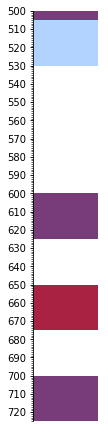

In [73]:
from striplog import Striplog

s = Striplog.from_csv(text=striplog_csv)
s.plot(aspect=4)

## Using a legend

In [77]:
s[0]

Interval({'top': Position({'middle': 500.0, 'units': 'm'}), 'base': Position({'middle': 525.0, 'units': 'm'}), 'description': '', 'data': {'datetime': '2010-02-01'}, 'components': [Component({'type': 'Perforation'})]})

In [75]:
legend_csv = """colour,comp type
red,Perforation
blue,Workover
green,Screen"""

from striplog import Legend

legend = Legend.from_csv(text=legend_csv)
legend

Legend(Decor({'_colour': '#ff0000', 'component': Component({'type': 'perforation'}), 'width': None, 'hatch': None})
Decor({'_colour': '#0000ff', 'component': Component({'type': 'workover'}), 'width': None, 'hatch': None})
Decor({'_colour': '#008000', 'component': Component({'type': 'screen'}), 'width': None, 'hatch': None}))

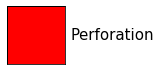

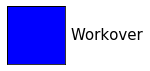

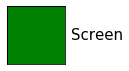

In [86]:
legend.plot()

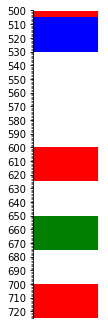

In [87]:
s.plot(aspect=3, legend=legend)

## Filtering the striplog

Bit of a glitch: you can't have an empty striplog.

In [88]:
for i in s:
    i.data['datetime'] = datetime.fromisoformat(i.data['datetime'])

In [89]:
s[0].data

{'datetime': datetime.datetime(2010, 2, 1, 0, 0)}

In [91]:
from ipywidgets import interact

@interact(year=(2009,2018,1))
def make_plot(year):
    y = datetime(year,1,1)
    filt = [i for i in s if i.data['datetime'] <= y]
    if filt:
        Striplog(filt).plot(aspect=4, legend=legend)

interactive(children=(IntSlider(value=2013, description='year', max=2018, min=2009), Output()), _dom_classes=(…